In [1]:
import pandas as pd

df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [2]:
X = df.values[:, 0:10]
Y = df.values[:, 10]

In [3]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [4]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print("X_train.shape : ",X_train.shape)
print("X_test.shape : ", X_test.shape)
print("X_val.shape : ", X_val.shape)
print("Y_val.shape : ", Y_val.shape)
print("Y_train.shape : ", Y_train.shape)
print("Y_test.shape : ", Y_test.shape)

X_train.shape :  (1022, 10)
X_test.shape :  (219, 10)
X_val.shape :  (219, 10)
Y_val.shape :  (219,)
Y_train.shape :  (1022,)
Y_test.shape :  (219,)


In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [8]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.6918 - accuracy: 0.4951 - val_loss: 0.6899 - val_accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.4961 - val_loss: 0.6806 - val_accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.4971 - val_loss: 0.6739 - val_accuracy: 0.4886
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5108 - val_loss: 0.6685 - val_accuracy: 0.5479
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6135 - val_loss: 0.6635 - val_accuracy: 0.6621
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6898 - val_loss: 0.6585 - val_accuracy: 0.7626
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.7319 - val_loss: 0.6537 - val_accuracy: 0.7945
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8748 - val_loss: 0.3021 - val_accuracy: 0.8904
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8767 - val_loss: 0.2982 - val_accuracy: 0.8904
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8748 - val_loss: 0.2981 - val_accuracy: 0.8995
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8767 - val_loss: 0.2927 - val_accuracy: 0.9132
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8767 - val_loss: 0.2907 - val_accuracy: 0.8904
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8787 - val_loss: 0.2897 - val_accuracy: 0.8950
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8718 - val_loss: 0.2866 - val_accuracy: 0.8904
Epoch 

In [10]:
test_loss,test_accuracy=model.evaluate(X_test, Y_test)

print(test_loss)
print(test_accuracy)

7/7 [==============================] - 0s 1ms/step - loss: 0.2504 - accuracy: 0.8950
0.2503597140312195
0.8949771523475647


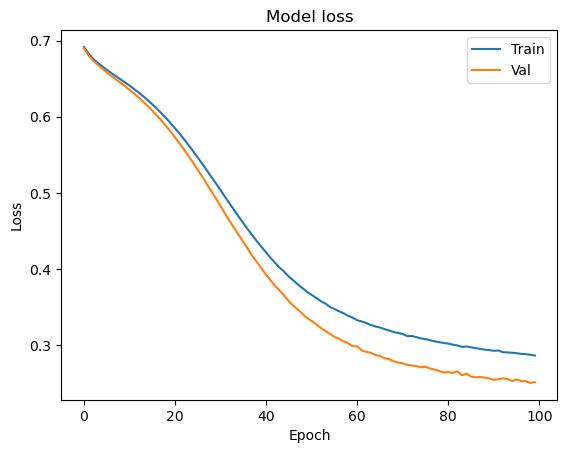

In [11]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

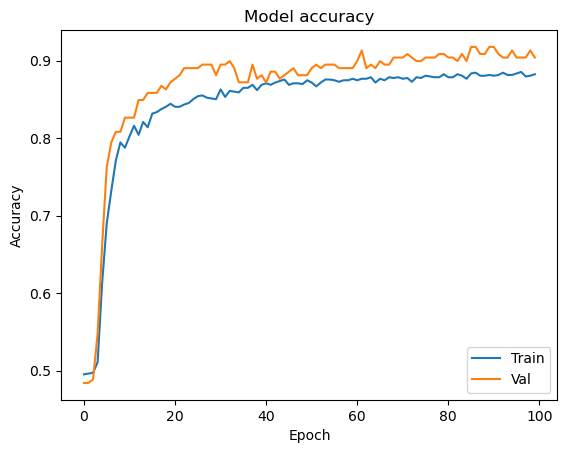

In [12]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [13]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 45ms/step - loss: 0.5273 - accuracy: 0.7446 - val_loss: 0.3924 - val_accuracy: 0.8447
Epoch 2/100
32/32 [==============================] - 1s 39ms/step - loss: 0.4025 - accuracy: 0.8239 - val_loss: 0.2994 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 1s 39ms/step - loss: 0.3247 - accuracy: 0.8640 - val_loss: 0.2847 - val_accuracy: 0.8995
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3048 - accuracy: 0.8640 - val_loss: 0.2475 - val_accuracy: 0.9041
Epoch 5/100
32/32 [==============================] - 1s 40ms/step - loss: 0.2908 - accuracy: 0.8865 - val_loss: 0.2363 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 1s 43ms/step - loss: 0.3007 - accuracy: 0.8728 - val_loss: 0.2500 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2982 - accuracy: 0.8767 - val_loss: 0.2472 - val_accuracy: 0.8904
Epoch 

32/32 [==============================] - 1s 30ms/step - loss: 0.1561 - accuracy: 0.9295 - val_loss: 0.2880 - val_accuracy: 0.9041
Epoch 59/100
32/32 [==============================] - 1s 31ms/step - loss: 0.1651 - accuracy: 0.9247 - val_loss: 0.3150 - val_accuracy: 0.8676
Epoch 60/100
32/32 [==============================] - 1s 31ms/step - loss: 0.1631 - accuracy: 0.9354 - val_loss: 0.3151 - val_accuracy: 0.9041
Epoch 61/100
32/32 [==============================] - 1s 32ms/step - loss: 0.1696 - accuracy: 0.9247 - val_loss: 0.2638 - val_accuracy: 0.8813
Epoch 62/100
32/32 [==============================] - 1s 31ms/step - loss: 0.1580 - accuracy: 0.9276 - val_loss: 0.3082 - val_accuracy: 0.8813
Epoch 63/100
32/32 [==============================] - 1s 32ms/step - loss: 0.1481 - accuracy: 0.9344 - val_loss: 0.3343 - val_accuracy: 0.9224
Epoch 64/100
32/32 [==============================] - 1s 31ms/step - loss: 0.1417 - accuracy: 0.9344 - val_loss: 0.3817 - val_accuracy: 0.9132
Epoch 65/100

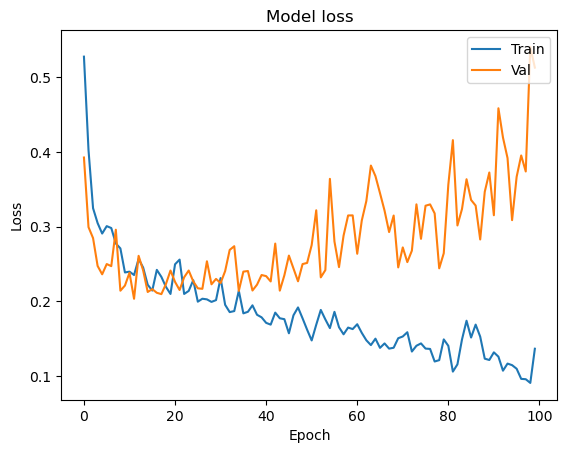

In [14]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

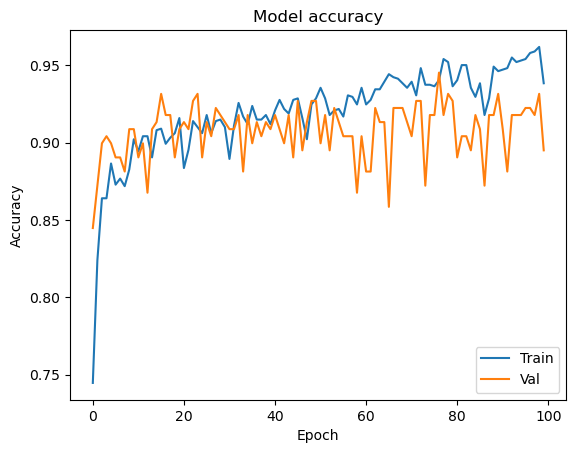

In [15]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [16]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer = regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 49ms/step - loss: 14.2487 - accuracy: 0.6047 - val_loss: 3.8945 - val_accuracy: 0.8721
Epoch 2/100
32/32 [==============================] - 1s 46ms/step - loss: 1.7220 - accuracy: 0.7935 - val_loss: 0.6311 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 47ms/step - loss: 0.5820 - accuracy: 0.8503 - val_loss: 0.5019 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 2s 48ms/step - loss: 0.5369 - accuracy: 0.8659 - val_loss: 0.4837 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 1s 40ms/step - loss: 0.5124 - accuracy: 0.8601 - val_loss: 0.4608 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 2s 53ms/step - loss: 0.5137 - accuracy: 0.8523 - val_loss: 0.4732 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4967 - accuracy: 0.8630 - val_loss: 0.4526 - val_accuracy: 0.8813
Epoch

32/32 [==============================] - 1s 43ms/step - loss: 0.4483 - accuracy: 0.8738 - val_loss: 0.4108 - val_accuracy: 0.8995
Epoch 59/100
32/32 [==============================] - 1s 43ms/step - loss: 0.4424 - accuracy: 0.8904 - val_loss: 0.3974 - val_accuracy: 0.9087
Epoch 60/100
32/32 [==============================] - 1s 43ms/step - loss: 0.4573 - accuracy: 0.8708 - val_loss: 0.4023 - val_accuracy: 0.9087
Epoch 61/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4391 - accuracy: 0.8816 - val_loss: 0.4100 - val_accuracy: 0.9041
Epoch 62/100
32/32 [==============================] - 1s 43ms/step - loss: 0.4361 - accuracy: 0.8836 - val_loss: 0.3964 - val_accuracy: 0.9041
Epoch 63/100
32/32 [==============================] - 1s 43ms/step - loss: 0.4505 - accuracy: 0.8689 - val_loss: 0.5019 - val_accuracy: 0.8265
Epoch 64/100
32/32 [==============================] - 1s 44ms/step - loss: 0.4694 - accuracy: 0.8650 - val_loss: 0.4118 - val_accuracy: 0.8995
Epoch 65/100

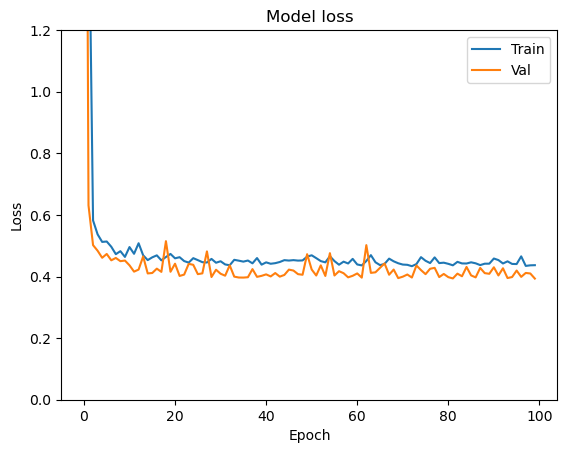

In [17]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

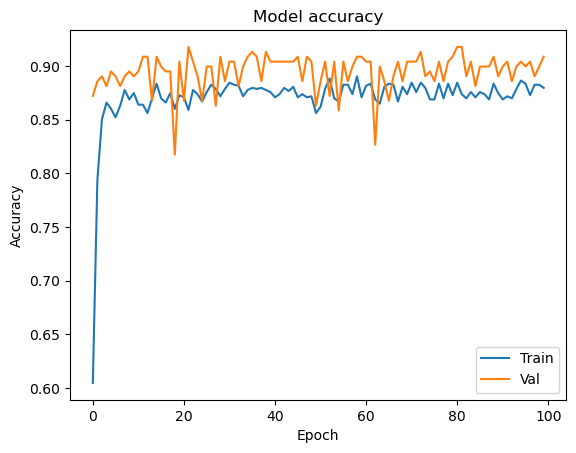

In [18]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [19]:
from sklearn.metrics import recall_score, f1_score, precision_score

In [20]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 998us/step


In [21]:
y_pred_classes=[]

for prob in y_pred:
    if prob >= 0.5:
        y_pred_classes.append(1)
    else:
        y_pred_classes.append(0)

In [22]:
precision = precision_score(Y_test, y_pred_classes)

recall = recall_score(Y_test, y_pred_classes)

f1 = f1_score(Y_test, y_pred_classes)

print("Precision:", round(precision*100,0))
print("Recall:", round(recall*100,0))
print("F1 Score:", round(f1*100,0))

Precision: 93.0
Recall: 87.0
F1 Score: 90.0


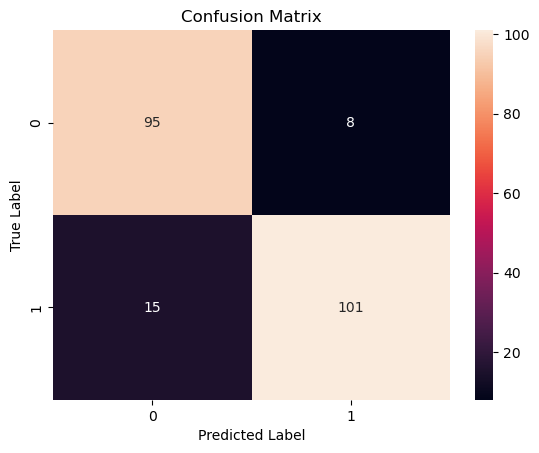

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(Y_test, y_pred_classes)

sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [24]:
model.save("houses_model.keras")

In [25]:
from joblib import dump

dump(min_max_scaler, "houses_min_max_scaler.pkl")

['houses_min_max_scaler.pkl']

In [27]:
import numpy as np

new_house = np.array( [[100,6,6,800, 2, 2, 3, 7, 1, 500]])

In [28]:
from joblib import load

min_max_scaler_loaded = load("houses_min_max_scaler.pkl")

new_house = min_max_scaler.transform(new_house)
new_house

array([[-0.00560892,  0.55555556,  0.625     ,  0.1309329 ,  0.66666667,
         1.        ,  0.375     ,  0.41666667,  0.33333333,  0.35260931]])

In [29]:
from keras.models import load_model

loaded_model = load_model("houses_model.keras")

In [30]:
new_prediction_proba = loaded_model.predict(new_house)

new_prediction = (new_prediction_proba > 0.5)

print(new_prediction)

1/1 [==============================] - 0s 86ms/step
[[ True]]
